In [47]:
import re
import matplotlib.pyplot as plt

filename = "non_blocking_result.txt"
filename_2 = "blocking_result.txt"

# [flow_num, lamda(%), T, EW_Q, EN_Q]
blocking_res = []
""
# [Eh^2, Eh, T, lamda, sita, EN_Q, EW_Q]
non_blocking_res = []

with open(filename, "r") as file:
    for line in file:
        text = line.rstrip()
        pattern = re.compile(
            r"Eh\^2:\s+(\d+) Eh:\s+(\d+) m:\s+(\d+) lambda:\s+([\d.]+) sita:\s+([\d.]+) EN_q:\s+([\de.-]+) EW_q:\s+([\de.-]+)")
        matches = pattern.findall(text)
        non_blocking_res.append([[float(val) for val in match] for match in matches])

with open(filename_2, "r") as file_2:
    for line in file_2:
        text_2 = line.rstrip()
        pattern_2 = re.compile(r"n = (\d+), lamda = (\d+), m = (\d+), EW_q = ([\d.]+) EN_q = ([\d.]+)")
        matches_2 = pattern_2.findall(text_2)
        blocking_res.append([[float(val) for val in match] for match in matches_2])

# for i in range(len(non_blocking_res)):
#     print(non_blocking_res[i])

# for i in range(len(blocking_res)):
#     print(blocking_res[i])

In [48]:
import seaborn as sns
import pandas as pd
import numpy as np
from collections import defaultdict

# 创建一些数据

# print(non_blocking_res)
column = 12

sitas = []
lamdas = []
nBLK_EN_Q = defaultdict(dict)
nBLK_EW_Q = defaultdict(dict)

for i in range(len(non_blocking_res)):
    sita = non_blocking_res[i][0][4]
    lamda = non_blocking_res[i][0][3]
    if sita not in sitas:
        sitas.append(round(sita, 2))
    if lamda not in lamdas:
        lamdas.append(round(lamda, 2))
    nBLK_EN_Q['{:.2f}'.format(sita)]['{:.2f}'.format(lamda)] = non_blocking_res[i][0][5]
    nBLK_EW_Q['{:.2f}'.format(sita)]['{:.2f}'.format(lamda)] = non_blocking_res[i][0][6]

print(sitas)
print(lamdas)
print(nBLK_EN_Q)
print(nBLK_EW_Q)



[0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96]
[0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96]
defaultdict(<class 'dict'>, {'0.02': {'0.02': 2.313359761811435e-115, '0.04': 2.4788035722814823e-89, '0.06': 2.018769733499369e-74, '0.08': 4.610707183976604e-64, '0.10': 3.375366512677588e-56, '0.12': 6.53826984370484e-50, '0.14': 1.0332561791664043e-44, '0.16': 2.6089437922455097e-40, '0.18': 1.6237886983257258e-36, '0.20': 3.349496327696241e-33, '0.22': 2.828349465163573e-30, '0.24': 1.1426712390554383e-27, '0.26': 2.486507440563520

[[1.4720698493844853e-88, 1.1559380490518265e-73, 2.545629773679679e-63, 1.797000885911004e-55, 3.3566879510825982e-49, 5.115635164161875e-44, 1.2457302933143998e-39, 7.477953183656641e-36, 1.487835347959726e-32, 1.2118839854253405e-29, 4.723183972401327e-27, 9.915729752868807e-25, 1.229513230223973e-22, 9.686870438563902e-21, 5.143529849091373e-19, 1.931553890920875e-17, 5.339248191122183e-16, 1.1234082355064484e-14, 1.8510157560778672e-13, 2.4470323847568034e-12, 2.65042403389865e-11, 2.395158740834761e-10, 1.8348830650102118e-09, 1.2084506312556028e-08, 6.927872233456198e-08, 3.4958044183563304e-07, 1.5682270096182541e-06, 6.311202164304257e-06, 2.297403211663954e-05, 7.622118589527514e-05, 0.00023210292943146133, 0.0006530006330898984, 0.0017080045243905888, 0.004178468184337692, 0.009617173303177847, 0.020946669940858958, 0.0434302352605826, 0.08624901038473327, 0.1651467822829109, 0.3071483162100232, 0.5597415004107587, 1.0108005805565519, 1.8381480078452996, 3.458091792314795, 7

TypeError: 'list' object cannot be interpreted as an integer

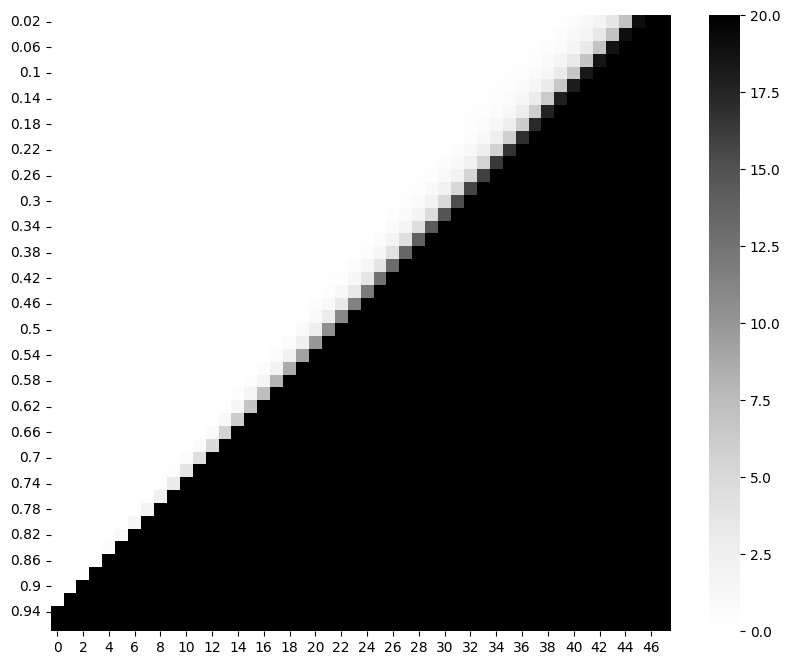

In [77]:
nBLK_EW_Q_list_2 = []
nBLK_EN_Q_list_2 = []

for i in range(2, 50):
    temp_1 = []
    temp_2 = []
    for j in range(2, 50):
        try:
            temp_1.append(nBLK_EW_Q["{:.2f}".format(i*0.02)]["{:.2f}".format(j*0.02)])
        except:
            temp_1.append(10)
    nBLK_EW_Q_list_2.append(temp_1)
    for j in range(2, 50):
        try:
            temp_2.append(nBLK_EN_Q["{:.2f}".format(i*0.02)]["{:.2f}".format(j*0.02)])
        except:
            temp_2.append(20)
    nBLK_EN_Q_list_2.append(temp_2)

print(nBLK_EN_Q_list_2)
print(nBLK_EW_Q_list_2)


import matplotlib.pyplot as plt

nBLKEWQ = np.array(nBLK_EW_Q_list_2)
nBLKENQ = np.array(nBLK_EN_Q_list_2)

print(nBLK_EN_Q_list_2)
print(nBLKENQ)

df = pd.DataFrame(nBLKENQ, lamdas)

# 创建热力图
plt.figure(figsize=(10,8))
sns.heatmap(df, cmap='Greys', annot=False)

temp = []
for i in range(50):
    temp.append("{:.2f}".format(i*0.02))

# 更改纵轴标签
plt.yticks(np.arange(0, range(temp)), temp, rotation=0)

# 显示图表
plt.show()

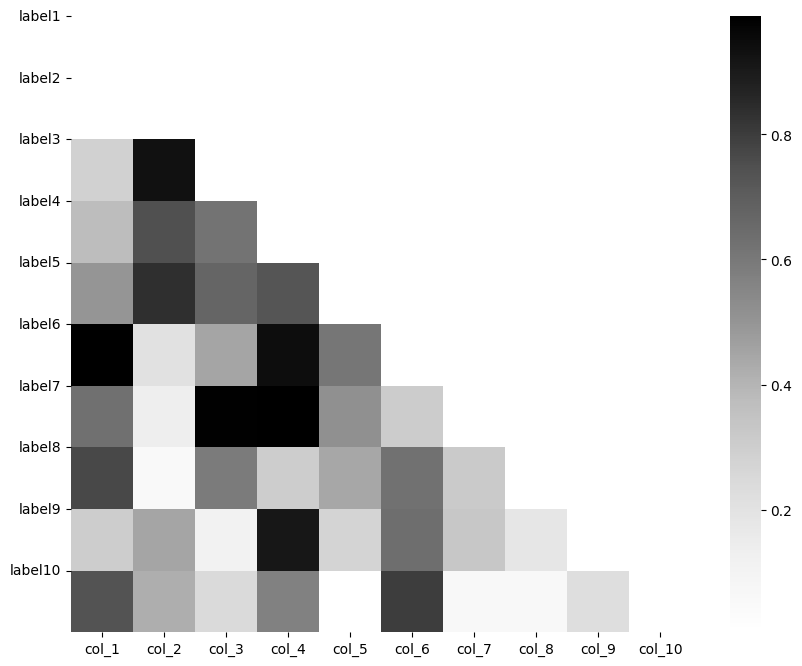

In [78]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 创建一些数据
data = np.random.rand(10, 10)
df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(1, 11)], index=[f'row_{i}' for i in range(1, 11)])

# 创建一个mask，只显示右上角的一半
mask = np.tri(*df.shape).T

# 创建热力图
plt.figure(figsize=(10,8))
sns.heatmap(df, cmap='Greys', annot=False, mask=mask)

# 更改纵轴标签
plt.yticks(np.arange(0, 10), ["label1", "label2", "label3", "label4", "label5", "label6", "label7", "label8", "label9", "label10"], rotation=0)

# 显示图表
plt.show()
